# vLLM推理部署模型

默认情况下，vLLM 的 API 服务会在 `http://localhost:8000` 启动。可以通过以下命令启动服务：
```bash
vllm serve /root/autodl-tmp/Qwen/Qwen3-8B
```
如果需要自定义服务的地址和端口，可以通过 `--host` 和 `--port` 参数指定：
```bash
vllm serve /root/autodl-tmp/Qwen/Qwen3-8B --host 0.0.0.0 --port 8080
```
执行如下：
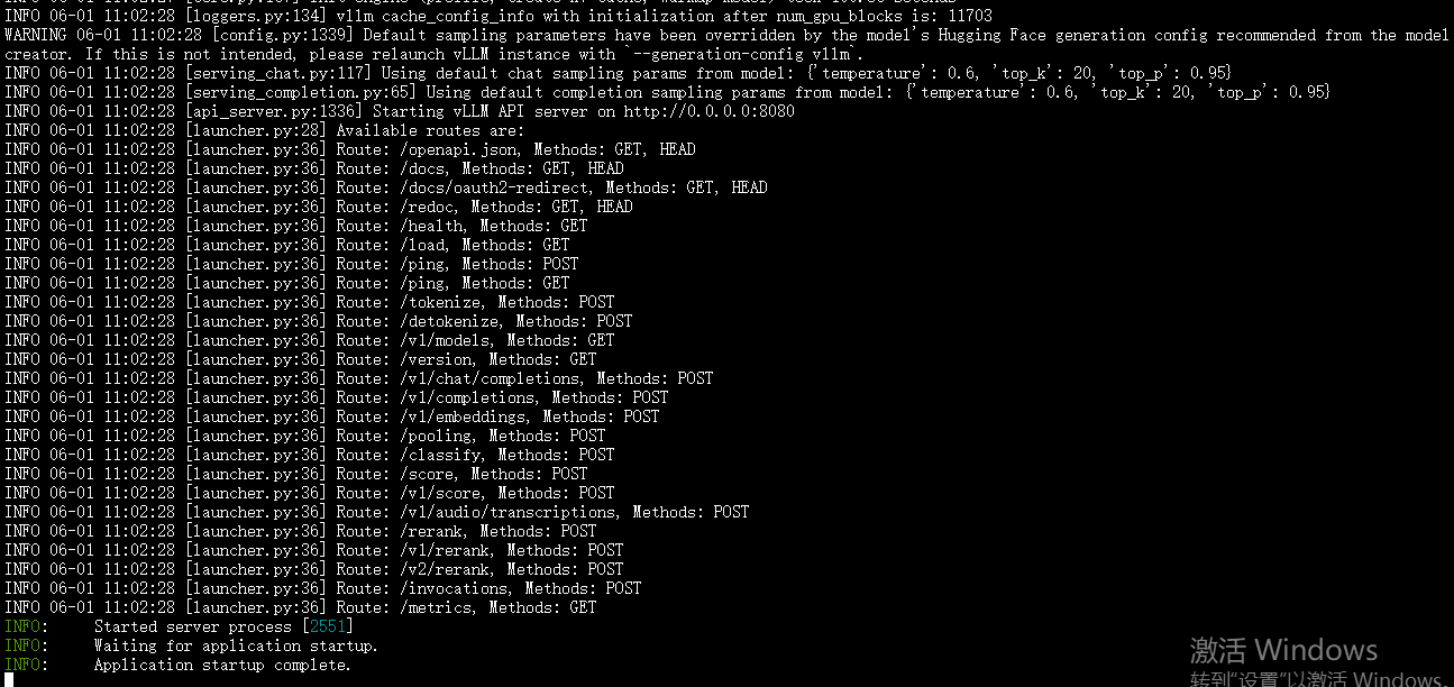


# Bash命令调用API 服务

## 服务调用
```bash
curl http://localhost:8080/v1/chat/completions -H "Content-Type: application/json" -d '{ 
  "model": "/root/autodl-tmp/Qwen3-8B",
  "messages": [
    {"role": "user", "content": "请给我简单介绍一下大模型"}
  ],
  "temperature": 0.6,
  "top_p": 0.95,
  "top_k": 20,
  "max_tokens": 32768
}'
```

## 模型响应如下：

```json
{"id":"chatcmpl-5df1903bfe0b43c7adf9a5d069f3c4de","object":"chat.completion","created":1748747034,"model":"/root/autodl-tmp/Qwen3-8B","choices":[{"index":0,"message":{"role":"assistant","reasoning_content":null,"content":"<think>\n嗯，用户让我简单介绍一下大模型。首先，我需要确定用户对大模型的了解程度。可能他们之前听说过，但不太清楚具体是什么，或者想了解基本概念。我得先定义什么是大模型，然后解释它的特点、应用场景，可能还要提到一些例子，比如GPT、BERT之类的。不过用户要求简单，所以不能太深入技术细节。\n\n接下来，用户可能的背景是什么？可能是学生、普通用户，或者对AI感兴趣的人。他们可能想知道大模型和传统模型的区别，或者为什么大模型重要。需要避免使用太多专业术语，保持语言通俗易懂。\n\n还要考虑用户可能的深层需求。他们可能想了解大模型的应用，比如在哪些领域有用，或者如何使用这些模型。所以介绍的时候要涵盖应用领域，比如自然语言处理、图像识别等。同时，可能需要提到训练数据和计算资源的需求，因为这是大模型的一个关键点。\n\n另外，用户可能对大模型的优缺点感兴趣，比如强大的能力但需要大量资源。不过用户要求简单介绍，所以这部分可以简要带过。还要注意不要遗漏重要概念，比如参数量、预训练和微调等，但用简单的话解释。\n\n最后，确保结构清晰，分点说明，比如定义、特点、应用、挑战。这样用户容易理解。可能需要检查有没有术语需要进一步解释，比如“参数量”是否需要举例说明。总之，保持简洁明了，覆盖主要方面，满足用户的基本需求。\n</think>\n\n大模型（Large Models）是指参数量巨大、具有强大计算和学习能力的深度学习模型，通常包含数亿到数千亿个参数。它们通过海量数据训练，能够理解和生成自然语言、图像、音频等多种类型的内容，并在多个领域展现出强大的能力。\n\n### 核心特点：\n1. **参数量庞大**：模型参数数量级通常在十亿到万亿级别，这是其强大能力的基础。\n2. **多模态能力**：部分大模型支持文本、图像、语音等多类型数据的处理（如GPT-4、DALL·E等）。\n3. **预训练+微调**：通过大规模数据预训练（如书籍、网页等），再针对具体任务进行微调，适应不同场景。\n4. **泛化能力强**：能处理未见过的新任务，例如回答问题、创作文本、编程等。\n\n### 典型应用：\n- **自然语言处理**：文本生成（如写文章、写代码）、翻译、问答、聊天机器人（如ChatGPT、通义千问）。\n- **图像生成**：根据描述生成图片（如DALL·E、Midjourney）。\n- **数据分析**：辅助决策、预测趋势等。\n- **跨领域任务**：如语音识别、视频分析等。\n\n### 优势与挑战：\n- **优势**：能力覆盖广泛，能处理复杂任务；通过少量数据即可微调适应新需求。\n- **挑战**：训练成本高（需要大量算力和数据）、能耗大、可能产生偏见或错误信息。\n\n### 举例：\n- **GPT系列**（OpenAI）：文本生成、对话等。\n- **BERT**（Google）：自然语言理解任务。\n- **通义千问**（Qwen）：阿里巴巴集团研发的多模态大模型。\n\n简而言之，大模型是人工智能领域的重要突破，正在深刻改变从日常交流到科学研究的多个领域。","tool_calls":[]},"logprobs":null,"finish_reason":"stop","stop_reason":null}],"usage":{"prompt_tokens":14,"total_tokens":743,"completion_tokens":729,"prompt_tokens_details":null},"prompt_logprobs":null,"kv_transfer_params":null}
```

## 禁用思考模式

In [ ]:
curl http://localhost:8080/v1/chat/completions -H "Content-Type: application/json" -d '{
  "model": "/root/autodl-tmp/Qwen3-8B",
  "messages": [
    {"role": "user", "content": "请给我简单介绍一下大模型"}
  ],
  "temperature": 0.7,
  "top_p": 0.8,
  "top_k": 20,
  "max_tokens": 8192,
  "presence_penalty": 1.5,
  "chat_template_kwargs": {"enable_thinking": false}
}'

## 输出如下
```json 
{"id":"chatcmpl-16a04740b3fb485ba256b76257751507","object":"chat.completion","created":1748747542,"model":"/root/autodl-tmp/Qwen3-8B","choices":[{"index":0,"message":{"role":"assistant","reasoning_content":null,"content":"当然可以！下面是一个关于“大模型”的简单介绍：\n\n---\n\n### 什么是大模型？\n\n**大模型**（Large Models）是指具有非常大的参数量（通常超过1亿个参数）的人工智能模型，尤其是那些基于深度学习的自然语言处理（NLP）模型。这类模型通过大规模的数据训练，具备强大的语言理解、生成和推理能力。\n\n---\n\n### 大模型的特点\n\n1. **参数量巨大**：通常有数十亿甚至上千亿个参数，这使得它们能够捕捉更复杂的模式。\n2. **强大的语言能力**：能理解和生成自然语言，包括回答问题、创作文本、翻译语言等。\n3. **多任务处理能力**：可以完成多种任务，如文本分类、情感分析、代码生成、对话系统等。\n4. **自监督学习**：很多大模型使用自监督学习方式训练，不需要大量人工标注数据。\n5. **泛化能力强**：在未见过的任务上也能表现出较好的性能。\n\n---\n\n### 大模型的应用\n\n- **聊天机器人**（如Chatbot）\n- **智能客服**\n- **内容创作**（写作、编程、诗歌等）\n- **数据分析与预测**\n- **语音识别与合成**\n- **图像生成与处理**\n\n---\n\n### 代表性的大模型\n\n- **GPT 系列**（如 GPT-3, GPT-4）\n- **BERT 系列**\n- **Ernie Bot**\n- **通义千问**（Qwen）\n- **Llama 系列**\n- **PaLM**\n\n---\n\n### 大模型的发展趋势\n\n- 更大的模型规模\n- 更高效的训练和推理方法\n- 更广泛的应用场景\n- 更强的多模态能力（结合文本、图像、音频等）\n\n---\n\n如果你对某个具体的大模型感兴趣，比如 GPT 或 Qwen，我也可以为你详细介绍它的功能和特点哦！","tool_calls":[]},"logprobs":null,"finish_reason":"stop","stop_reason":null}],"usage":{"prompt_tokens":18,"total_tokens":418,"completion_tokens":400,"prompt_tokens_details":null},"prompt_logprobs":null,"kv_transfer_params":null}
```

# python代码调用API服务

In [1]:
from openai import OpenAI

openai_api_key = "EMPTY"
openai_api_base = "http://localhost:8080/v1"

client = OpenAI(
    api_key=openai_api_key,
    base_url=openai_api_base,
)

chat_response = client.chat.completions.create(
    model="/root/autodl-tmp/Qwen3-8B",
    messages=[
        {"role": "user", "content": "请给我简单介绍一下大模型"},
    ],
    max_tokens=32768,
    temperature=0.6,
    top_p=0.95,
    extra_body={
        "top_k": 20,
    },
)
print("Chat response:", chat_response)

Chat response: ChatCompletion(id='chatcmpl-a8100a099f4446e5a222aa8f70444b43', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='<think>\n好的，用户让我简单介绍一下大模型。首先，我需要明确大模型指的是什么。大模型通常指的是大规模预训练模型，比如像GPT、BERT这样的模型。用户可能对AI领域不太熟悉，所以需要从基础讲起，避免使用太多专业术语。\n\n接下来，我得考虑用户的需求。他们可能是在学习AI，或者对新技术感兴趣，想了解大模型的基本概念。也有可能他们想应用这些模型，但不知道从哪里开始。所以，我需要涵盖定义、特点、应用场景以及优缺点，这样用户能有一个全面的了解。\n\n然后，我需要组织内容结构。先定义大模型，然后讲它们的规模和训练方法，接着是主要特点，比如参数量大、多任务处理能力等。之后，应用场景部分要具体，比如自然语言处理、图像识别等。最后，优缺点部分要平衡，指出它们的强大之处和局限性，比如计算资源需求高、可能的偏见问题。\n\n还要注意避免使用过于技术化的语言，保持简洁易懂。比如，解释参数量时，可以举例说明，而不是直接说“数亿到数万亿参数”。同时，可能需要提到一些知名的模型，如GPT、BERT，帮助用户更容易理解。\n\n另外，用户可能想知道大模型的实际应用，所以举一些例子会更好，比如聊天机器人、翻译工具、内容生成等。这样用户能更直观地理解大模型的作用。\n\n还要考虑潜在的问题，比如大模型的训练成本高，可能对普通用户来说不太友好，或者存在伦理和隐私问题，这些也需要简要提及，让用户有全面的认识。\n\n最后，检查内容是否准确，确保没有错误信息，比如大模型的参数量范围是否正确，应用场景是否恰当。同时保持语言流畅，结构清晰，让用户能轻松理解。\n</think>\n\n大模型（Large Models）是指基于深度学习技术，通过大规模数据训练得到的具有强大计算能力和泛化能力的模型。它们通常包含数亿到数万亿个参数（参数是模型内部用于学习数据特征的变量），能够处理复杂的任务，如自然语言理解、图像识别、语音处理等。\n\n### 核心特

# 通过python代码利用vllm部署推理API服务

In [3]:
from transformers import AutoTokenizer
from vllm import LLM, SamplingParams

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("/root/autodl-tmp/Qwen3-8B")

# Configure the sampling parameters
sampling_params = SamplingParams(temperature=0.6, top_p=0.95, top_k=20, max_tokens=32768)

# Initialize the vLLM engine
llm = LLM(model="/root/autodl-tmp/Qwen3-8B")

# Prepare the input to the model
prompt = "Give me a short introduction to large language models."
messages = [
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
)

# Generate outputs
outputs = llm.generate([text], sampling_params)

# Print the outputs
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}, Generated text: {generated_text!r}")

INFO 06-01 11:22:23 [__init__.py:31] Available plugins for group vllm.general_plugins:
INFO 06-01 11:22:23 [__init__.py:33] - lora_filesystem_resolver -> vllm.plugins.lora_resolvers.filesystem_resolver:register_filesystem_resolver
INFO 06-01 11:22:23 [__init__.py:36] All plugins in this group will be loaded. Set `VLLM_PLUGINS` to control which plugins to load.
INFO 06-01 11:22:30 [config.py:793] This model supports multiple tasks: {'reward', 'classify', 'generate', 'embed', 'score'}. Defaulting to 'generate'.
INFO 06-01 11:22:30 [config.py:2118] Chunked prefill is enabled with max_num_batched_tokens=8192.
INFO 06-01 11:22:31 [core.py:438] Waiting for init message from front-end.
INFO 06-01 11:22:31 [core.py:65] Initializing a V1 LLM engine (v0.9.0.1) with config: model='/root/autodl-tmp/Qwen3-8B', speculative_config=None, tokenizer='/root/autodl-tmp/Qwen3-8B', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, override_neuron_config={}, tokenizer_revision=None, trust_remote

Loading safetensors checkpoint shards:   0% Completed | 0/5 [00:00<?, ?it/s]


INFO 06-01 11:22:37 [default_loader.py:280] Loading weights took 4.74 seconds
INFO 06-01 11:22:38 [gpu_model_runner.py:1549] Model loading took 15.2683 GiB and 4.939519 seconds
INFO 06-01 11:22:46 [backends.py:459] Using cache directory: /root/.cache/vllm/torch_compile_cache/ab6b88f9b6/rank_0_0 for vLLM's torch.compile
INFO 06-01 11:22:46 [backends.py:469] Dynamo bytecode transform time: 8.50 s
INFO 06-01 11:22:52 [backends.py:132] Directly load the compiled graph(s) for shape None from the cache, took 5.558 s
INFO 06-01 11:22:53 [monitor.py:33] torch.compile takes 8.50 s in total
INFO 06-01 11:22:55 [kv_cache_utils.py:637] GPU KV cache size: 186,944 tokens
INFO 06-01 11:22:55 [kv_cache_utils.py:640] Maximum concurrency for 40,960 tokens per request: 4.56x
INFO 06-01 11:23:21 [gpu_model_runner.py:1933] Graph capturing finished in 26 secs, took 0.59 GiB
INFO 06-01 11:23:21 [core.py:167] init engine (profile, create kv cache, warmup model) took 43.64 seconds


Adding requests:   0%|          | 0/1 [00:00<?, ?it/s]

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Prompt: '<|im_start|>user\nGive me a short introduction to large language models.<|im_end|>\n<|im_start|>assistant\n', Generated text: "<think>\nOkay, the user is asking for a short introduction to large language models. Let me start by recalling what I know about them. Large language models are a type of AI that can understand and generate human-like text. They're based on deep learning and neural networks. I should mention their size, like having billions of parameters, which allows them to handle complex tasks. Also, they're trained on vast amounts of text data, which helps them learn language patterns. Applications include things like answering questions, writing, coding, and more. I need to keep it concise but cover the key points: what they are, how they work, their training data, and their uses. Maybe also touch on their capabilities, like multilingual support and reasoning. Wait, should I mention specific examples like GPT or BERT? The user didn't ask for specific models, so ma